In [66]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [68]:
#converting csv files to pandas dataframes
df_0 = pd.read_csv('california/CRMLSSold202412.csv')
df_1 = pd.read_csv('california/CRMLSSold202501_filled.csv')
df_2 = pd.read_csv('california/CRMLSSold202502.csv')
df_3 = pd.read_csv('california/CRMLSSold202503.csv')
df_4 = pd.read_csv('california/CRMLSSold202504.csv')
df_5 = pd.read_csv('california/CRMLSSold202505.csv')

In [69]:
#dropping 2 extra columns
df_1 = df_1.drop(columns=['latfilled','lonfilled'])

In [70]:
#list with all the dfs as elements in chronological order
all_dfs = [df_0,df_1,df_2,df_3,df_4,df_5]

In [71]:
df = pd.concat(all_dfs)

In [72]:
important_features = [
    'BedroomsTotal',
    'BathroomsTotalInteger',
    'LivingArea',
    'LotSizeAcres',              
    'GarageSpaces',
    'YearBuilt',
    'Stories',
    'PostalCode',
    'City',
    'StateOrProvince',
    'Latitude',
    'Longitude',
    'PropertyType',
    'PropertySubType',
    'PoolPrivateYN', 
    'FireplaceYN'
]

In [73]:
excluded_features = [
    'ListPrice',
    'OriginalListPrice',
    'CloseDate',
    'ListAgentEmail',
    'ListAgentFirstName',
    'ListAgentLastName',
    'ListAgentFullName',
    'ListAgentAOR',
    'BuyerAgentFirstName',
    'BuyerAgentLastName',
    'BuyerAgentMlsId',
    'BuyerAgentAOR',
    'BuyerOfficeAOR',
    'BuyerOfficeName',
    'BuyerAgencyCompensation',
    'BuyerAgencyCompensationType',
    'ListOfficeName',
    'CoListOfficeName',
    'CoListAgentFirstName',
    'CoListAgentLastName',
    'CoBuyerAgentFirstName',
    'ContractStatusChangeDate',
    'ListingContractDate',
    'PurchaseContractDate',
    'MlsStatus',
    'ListingId',
    'ListingKey',
    'ListingKeyNumeric',
    'BusinessType',
    'ElementarySchool',
    'MiddleOrJuniorSchool',
    'HighSchool',
    'MLSAreaMajor',
    'SubdivisionName',
    'TaxYear',
    'TaxAnnualAmount',
    'AssociationFee',
    'AssociationFeeFrequency',
    'UnparsedAddress',
    'StreetNumberNumeric',
    'BelowGradeFinishedArea',
    'CoveredSpaces',
    'FireplacesTotal',
    'Levels',
    'BuilderName',
    'NewConstructionYN',
    'DaysOnMarket',
    'latfilled',
    'lonfilled'
]

In [77]:
keep_cols = important_features + ['ClosePrice']

In [82]:
df_model = df[keep_cols].copy()

In [84]:
print("\nMissing values in model input:")
print(df_model.isnull().sum().sort_values(ascending=False))


Missing values in model input:
Stories                  24843
GarageSpaces             16850
PoolPrivateYN            15351
LotSizeAcres             11397
FireplaceYN              11241
PropertySubType           9956
LivingArea                9191
BedroomsTotal             8655
BathroomsTotalInteger     5990
YearBuilt                 5629
City                       103
PostalCode                  29
Latitude                    20
Longitude                   16
ClosePrice                   3
PropertyType                 0
StateOrProvince              0
dtype: int64


In [86]:
df_model = df_model[df_model['ClosePrice'].notna()].copy()

In [88]:
print("\nMissing values in model input:")
print(df_model.isnull().sum().sort_values(ascending=False))


Missing values in model input:
Stories                  24842
GarageSpaces             16849
PoolPrivateYN            15350
LotSizeAcres             11397
FireplaceYN              11240
PropertySubType           9955
LivingArea                9190
BedroomsTotal             8654
BathroomsTotalInteger     5990
YearBuilt                 5629
City                       103
PostalCode                  29
Latitude                    20
Longitude                   16
PropertyType                 0
StateOrProvince              0
ClosePrice                   0
dtype: int64


In [90]:
missing_stories = df_model[df_model['Stories'].isna()]
missing_stories

BedroomsTotal  BathroomsTotalInteger  LivingArea  LotSizeAcres  \
0                NaN                    0.0         NaN        2.0300   
1                NaN                    NaN         NaN        0.2100   
2                NaN                    NaN         NaN      160.0000   
3                8.0                    6.0      1151.0        0.1473   
4                NaN                    NaN         NaN        0.1047   
...              ...                    ...         ...           ...   
23147            NaN                    NaN         NaN        1.9900   
23148            NaN                    NaN         NaN        2.4700   
23149            NaN                    NaN         NaN      160.0000   
23152            NaN                    0.0         NaN        0.0000   
23153            NaN                    NaN         NaN        0.8500   

       GarageSpaces  YearBuilt  Stories PostalCode            City  \
0               0.0        NaN      NaN      91331         Pacoima   
1               NaN        NaN      NaN      92530   Lake Elsinore   
2               NaN        NaN      NaN      92356  Lucerne Valley   
3               0.0     1979.0      NaN      95122        San Jose   
4               NaN        NaN      NaN      95464            Nice   
...             ...        ...      ...        ...             ...   
23147           NaN        NaN      NaN      92307    Apple Valley   
23148           NaN        NaN      NaN      92307    Apple Valley   
23149           NaN        NaN      NaN      92345       Oak Hills   
23152           NaN        NaN      NaN      94803     El Sobrante   
23153           NaN     1948.0      NaN      95453        Lakeport   

      StateOrProvince   Latitude   Longitude    PropertyType  \
0                  CA  34.271680 -118.403023            Land   
1                  CA  33.668691 -117.334438            Land   
2                  CA  34.499080 -116.857925            Land   
3                  CA  37.330858 -121.849610     Residential   
4                  CA  39.125024 -122.860206            Land   
...               ...        ...         ...             ...   
23147              CA  34.669552 -117.185041            Land   
23148              CA  34.669608 -117.181999            Land   
23149              CA  34.353014 -117.426088            Land   
23152              CA  37.983172 -122.302091  CommercialSale   
23153              CA  39.099063 -122.900808  CommercialSale   

             PropertySubType PoolPrivateYN FireplaceYN  ClosePrice  
0                        NaN           NaN         NaN   2100000.0  
1                        NaN           NaN         NaN    125000.0  
2                        NaN           NaN         NaN    135000.0  
3      SingleFamilyResidence           NaN        True   1120000.0  
4                        NaN           NaN         NaN      4000.0  
...                      ...           ...         ...         ...  
23147                    NaN           NaN         NaN     14750.0  
23148                    NaN           NaN         NaN     14070.0  
23149                    NaN           NaN         NaN   4000000.0  
23152                    NaN           NaN         NaN       400.0  
23153            MultiFamily           NaN         NaN    750000.0  

[24842 rows x 17 columns]

In [92]:
# Drop 'Stories'
df_model.drop(columns=['Stories'], inplace=True)

# Fill with 0
df_model['GarageSpaces'] = df_model['GarageSpaces'].fillna(0)

# Fill with median
df_model['LotSizeAcres'] = df_model['LotSizeAcres'].fillna(df_model['LotSizeAcres'].median())
df_model['LivingArea'] = df_model['LivingArea'].fillna(df_model['LivingArea'].median())
df_model['BedroomsTotal'] = df_model['BedroomsTotal'].fillna(df_model['BedroomsTotal'].median())
df_model['BathroomsTotalInteger'] = df_model['BathroomsTotalInteger'].fillna(df_model['BathroomsTotalInteger'].median())
df_model['YearBuilt'] = df_model['YearBuilt'].fillna(df_model['YearBuilt'].median())

# Fill with categorical modes or defaults
df_model['City'] = df_model['City'].fillna(df_model['City'].mode()[0])
df_model['PostalCode'] = df_model['PostalCode'].fillna(df_model['PostalCode'].mode()[0])
df_model['StateOrProvince'] = df_model['StateOrProvince'].fillna('CA')
df_model['PropertySubType'] = df_model['PropertySubType'].fillna('SingleFamilyResidence')

# Drop rows with missing lat/lon (only ~1k)
df_model.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [94]:
print("\nMissing values in model input:")
print(df_model.isnull().sum().sort_values(ascending=False))


Missing values in model input:
PoolPrivateYN            15340
FireplaceYN              11231
BedroomsTotal                0
BathroomsTotalInteger        0
LivingArea                   0
LotSizeAcres                 0
GarageSpaces                 0
YearBuilt                    0
PostalCode                   0
City                         0
StateOrProvince              0
Latitude                     0
Longitude                    0
PropertyType                 0
PropertySubType              0
ClosePrice                   0
dtype: int64


95th percentile: $2,500,000


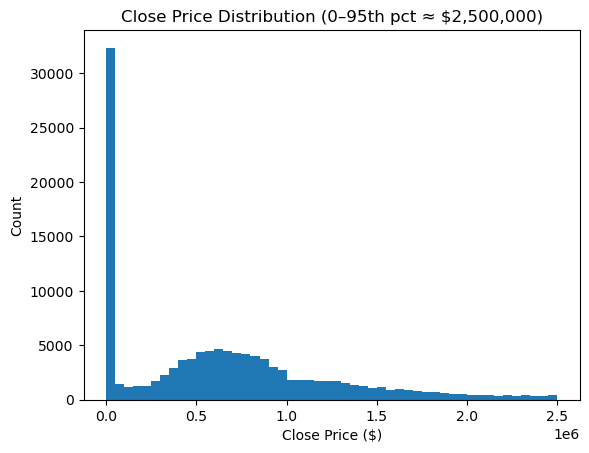

In [96]:
p95 = df_model['ClosePrice'].quantile(0.95)
print(f"95th percentile: ${p95:,.0f}")
plt.figure()
plt.hist(df_model['ClosePrice'], bins=50, range=(0, p95))
plt.title(f'Close Price Distribution (0–95th pct ≈ ${p95:,.0f})')
plt.xlabel('Close Price ($)')
plt.ylabel('Count')
plt.show()

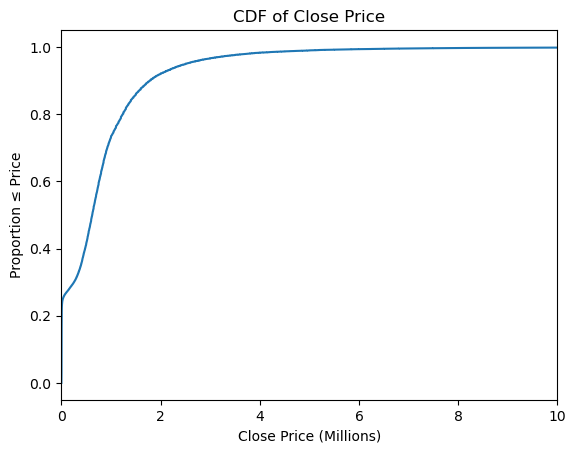

In [97]:
prices = np.sort(df_model['ClosePrice'])
cdf = np.arange(len(prices)) / float(len(prices))

plt.figure()
plt.plot(prices/1e6, cdf)
plt.title('CDF of Close Price')
plt.xlabel('Close Price (Millions)')
plt.ylabel('Proportion ≤ Price')
plt.xlim(0,10)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/anaconda3/lib/python3.12/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mlab.py:905: RuntimeWarning: invalid value encountered in subtract
  diff = self.dataset - points[:, i, np.newaxis]


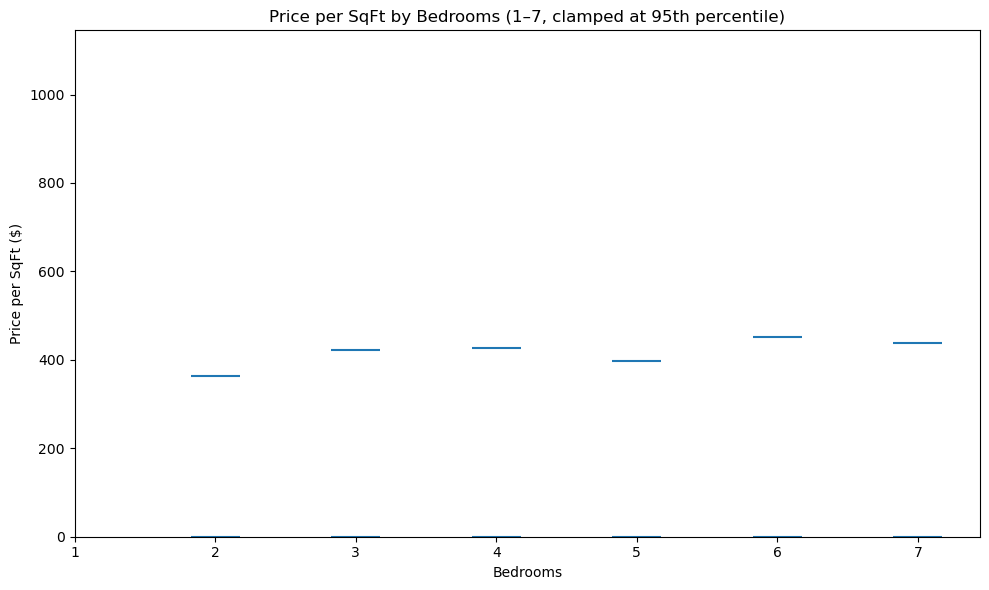

In [100]:
if 'PricePerSqFt' not in df_model:
    df_model['PricePerSqFt'] = df_model['ClosePrice'] / df_model['LivingArea']

beds = [b for b in sorted(df_model['BedroomsTotal'].dropna().unique()) if 1 <= b <= 7]
data = [df_model.loc[df_model['BedroomsTotal'] == b, 'PricePerSqFt'] for b in beds]

p95 = df_model['PricePerSqFt'].quantile(0.95)

plt.figure(figsize=(10, 6))
plt.violinplot(data,
               positions=beds,
               showmedians=True,
               widths=0.7)
plt.ylim(0, p95)
plt.xticks(beds)
plt.xlabel('Bedrooms')
plt.ylabel('Price per SqFt ($)')
plt.title('Price per SqFt by Bedrooms (1–7, clamped at 95th percentile)')
plt.tight_layout()
plt.show()

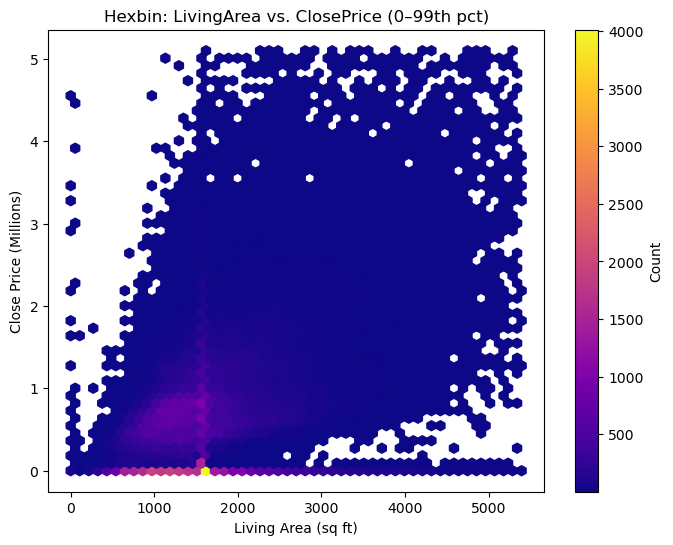

In [102]:
price_cut = df_model['ClosePrice'].quantile(0.99)
area_cut  = df_model['LivingArea'].quantile(0.99)

df_trim = df_model[
    (df_model['ClosePrice'] <= price_cut) &
    (df_model['LivingArea'] <= area_cut)
]

plt.figure(figsize=(8,6))
hb = plt.hexbin(
    df_trim['LivingArea'],
    df_trim['ClosePrice'] / 1e6,
    gridsize=50,
    mincnt=1,
    cmap='plasma'
)
plt.title('Hexbin: LivingArea vs. ClosePrice (0–99th pct)')
plt.xlabel('Living Area (sq ft)')
plt.ylabel('Close Price (Millions)')
cb = plt.colorbar(hb)
cb.set_label('Count')
plt.show()

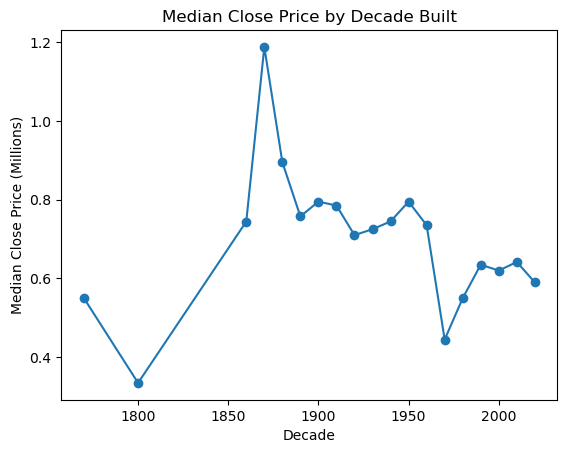

In [104]:
df_model['BuiltDecade'] = (df_model['YearBuilt'] // 10) * 10
decade_median = df_model.groupby('BuiltDecade')['ClosePrice'].median() / 1e6

plt.figure()
plt.plot(decade_median.index, decade_median.values, marker='o')
plt.title('Median Close Price by Decade Built')
plt.xlabel('Decade')
plt.ylabel('Median Close Price (Millions)')
plt.show()

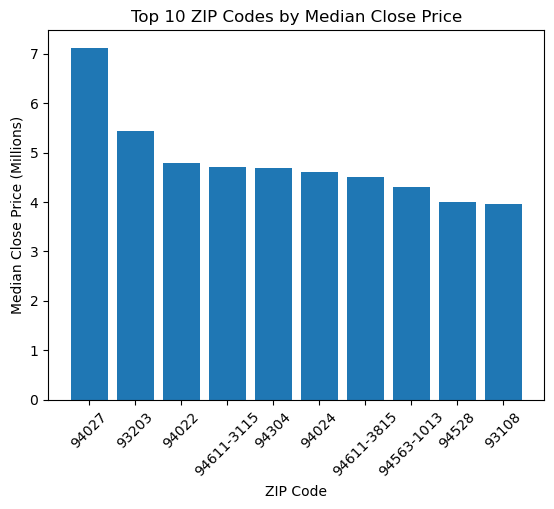

In [106]:
zip_med = df_model.groupby('PostalCode')['ClosePrice'].median().sort_values(ascending=False).head(10) / 1e6

plt.figure()
plt.bar(zip_med.index, zip_med.values)
plt.title('Top 10 ZIP Codes by Median Close Price')
plt.xlabel('ZIP Code')
plt.ylabel('Median Close Price (Millions)')
plt.xticks(rotation=45)
plt.show()

Top 6 features most correlated with ClosePrice:
BathroomsTotalInteger    0.090372
BedroomsTotal            0.077191
GarageSpaces             0.019482
Longitude                0.016171
Latitude                 0.010754
LivingArea               0.002439
Name: ClosePrice, dtype: float64


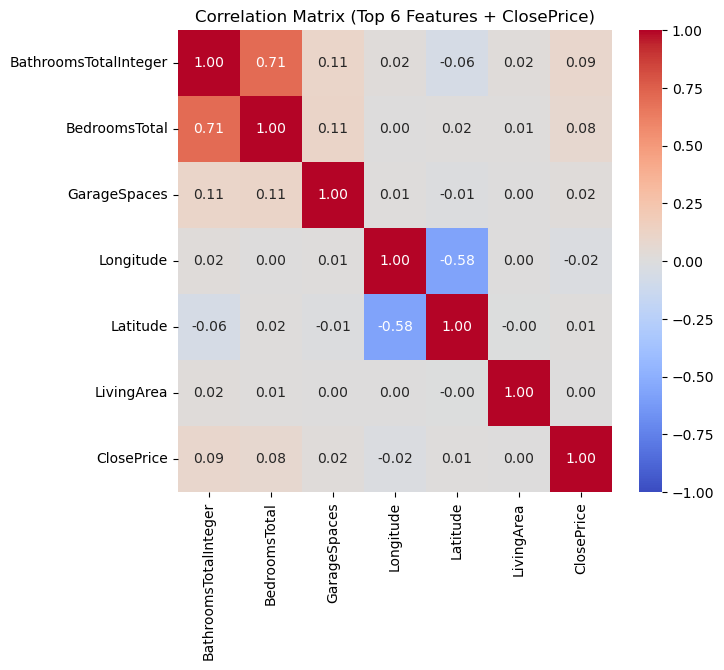

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_model.drop(columns=['PricePerSqFt'], errors='ignore').corr(numeric_only=True)

target_corr = corr_matrix['ClosePrice'].drop('ClosePrice')

top6 = target_corr.abs().sort_values(ascending=False).head(6)
print("Top 6 features most correlated with ClosePrice:")
print(top6)

cols_to_plot = top6.index.tolist() + ['ClosePrice']

small_corr = df_model[cols_to_plot].corr()

plt.figure(figsize=(7, 6))
sns.heatmap(
    small_corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Correlation Matrix (Top 6 Features + ClosePrice)')
plt.show()


Training model on log-transformed prices...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] categorical_feature is set=PropertyType,City,PostalCode, categorical_column=3,4,5 will be ignored. Current value: categorical_feature=PropertyType,City,PostalCode
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 91041, number of used features: 6
[LightGBM] [Info] Start training from score 2.514612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

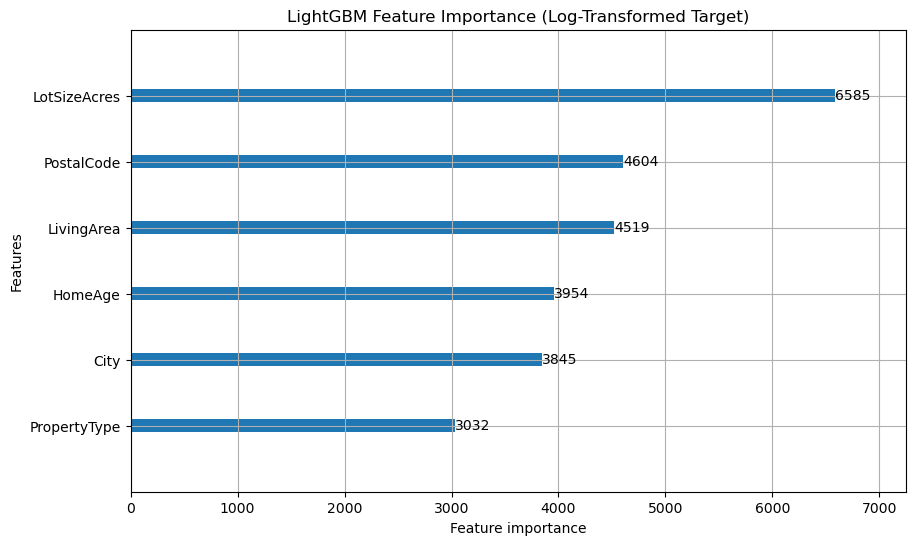


Sample Predictions vs Actuals:
          Actual     Predicted
8191      3100.0  3.544030e+03
10472  1675000.0  1.392605e+06
181       7200.0  6.747233e+03
14085   860000.0  8.375855e+05
20211     5995.0  5.277118e+03
20231  1650000.0  1.530930e+06
15710   591200.0  6.544789e+05
19413     3200.0  3.396181e+03
8859      5500.0  5.784965e+03
1318      3300.0  3.100704e+03


In [146]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import lightgbm as lgb
import matplotlib.pyplot as plt

# Remove top/bottom 1% of prices
price_limits = df_model['ClosePrice'].quantile([0.01, 0.99])
df_model = df_model[df_model['ClosePrice'].between(*price_limits)]

# Feature engineering
df_model['HomeAge'] = 2025 - df_model['YearBuilt']

# Define key features
numeric_features = [
    'LivingArea', 
    'LotSizeAcres', 'HomeAge'
]
categorical_features = [
    'PropertyType', 'City', 'PostalCode'
]
target = 'ClosePrice'

# Preprocessing
# Convert categoricals to pandas 'category' dtype
for col in categorical_features:
    df_model[col] = df_model[col].astype('category')

# Apply log transformation to target variable
y_log = np.log1p(df_model[target])  # Using log1p to handle zeros

# Split data into train/test
X = df_model[numeric_features + categorical_features]
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Initialize and train LightGBM model

model = lgb.LGBMRegressor(
    n_estimators=1000,           # Increased from 200
    learning_rate=0.05,          # Reduced from 0.1
    max_depth=5,                 # Increased from 3
    min_child_samples=20,        # Reduced from 50
    reg_alpha=0.1,               # L1 regularization
    reg_lambda=0.1,              # L2 regularization
    categorical_feature=categorical_features,
    random_state=42,
    objective='tweedie'          # Better for right-skewed data
)

print("\nTraining model on log-transformed prices...")
model.fit(X_train, y_train_log)

# Predictions (in log space)
y_pred_log = model.predict(X_test)

# Convert predictions back to original scale
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.4f}")

# Feature Importance
print("\nPlotting feature importance...")
lgb.plot_importance(model, figsize=(10, 6), max_num_features=20)
plt.title("LightGBM Feature Importance (Log-Transformed Target)")
plt.show()

# Compare predictions vs actuals
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nSample Predictions vs Actuals:")
print(results.head(10))

BedroomsTotal                0
BathroomsTotalInteger        0
LivingArea                   0
LotSizeAcres                 0
GarageSpaces                 0
YearBuilt                    0
PostalCode                   0
City                         0
StateOrProvince              0
Latitude                     0
Longitude                    0
PropertyType                 0
PropertySubType              0
PoolPrivateYN            15340
FireplaceYN              11231
ClosePrice                   0
PricePerSqFt                 1
BuiltDecade                  0
dtype: int64


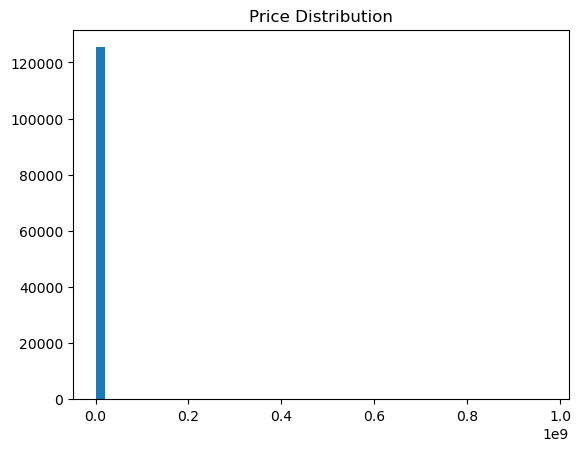

In [148]:
# Compare predictions vs actuals
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head(10))

# Check for extreme values
print("Max prediction:", y_pred.max())
print("Min prediction:", y_pred.min())

          Actual     Predicted
8191      3100.0  3.544030e+03
10472  1675000.0  1.392605e+06
181       7200.0  6.747233e+03
14085   860000.0  8.375855e+05
20211     5995.0  5.277118e+03
20231  1650000.0  1.530930e+06
15710   591200.0  6.544789e+05
19413     3200.0  3.396181e+03
8859      5500.0  5.784965e+03
1318      3300.0  3.100704e+03
Max prediction: 20663038.834678397
Min prediction: 1746.9538132844118


In [150]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
cv_scores = []

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_log.iloc[train_idx], y_log.iloc[val_idx]
    
    model.fit(X_train, y_train)
    preds = np.expm1(model.predict(X_val))
    cv_scores.append(mean_absolute_percentage_error(np.expm1(y_val), preds))

print(f"\nCross-Validated MAPE: {np.mean(cv_scores)*100:.2f}% (±{np.std(cv_scores)*100:.2f}%)")

/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] categorical_feature is set=PropertyType,City,PostalCode, categorical_column=3,4,5 will be ignored. Current value: categorical_feature=PropertyType,City,PostalCode
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2300
[LightGBM] [Info] Number of data points in the train set: 91041, number of used features: 6
[LightGBM] [Info] Start training from score 2.516366
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] categorical_feature is set=PropertyType,City,PostalCode, categorical_column=3,4,5 will be ignored. Current value: categorical_feature=PropertyType,City,PostalCode
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2305
[LightGBM] [Info] Number of data points in the train set: 91041, number of used features: 6
[LightGBM] [Info] Start training from score 2.516902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] categorical_feature is set=PropertyType,City,PostalCode, categorical_column=3,4,5 will be ignored. Current value: categorical_feature=PropertyType,City,PostalCode
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2299
[LightGBM] [Info] Number of data points in the train set: 91042, number of used features: 6
[LightGBM] [Info] Start training from score 2.512841
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] categorical_feature is set=PropertyType,City,PostalCode, categorical_column=3,4,5 will be ignored. Current value: categorical_feature=PropertyType,City,PostalCode
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2293
[LightGBM] [Info] Number of data points in the train set: 91042, number of used features: 6
[LightGBM] [Info] Start training from score 2.511389
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2137: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(
/opt/anaconda3/lib/python3.12/site-packages/lightgbm/basic.py:2159: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f"{cat_alias} in param dict is overridden.")


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] categorical_feature is set=PropertyType,City,PostalCode, categorical_column=3,4,5 will be ignored. Current value: categorical_feature=PropertyType,City,PostalCode
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2293
[LightGBM] [Info] Number of data points in the train set: 91042, number of used features: 6
[LightGBM] [Info] Start training from score 2.512849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

/var/folders/y8/mzq28ygd333_s7ffnk8_84cc0000gn/T/ipykernel_68326/2409775401.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HomeAge'] = 2025 - df['YearBuilt']
/var/folders/y8/mzq28ygd333_s7ffnk8_84cc0000gn/T/ipykernel_68326/2409775401.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LargeLot'] = (df['LotSizeAcres'] > 0.5).astype('category')
[I 2025-07-10 17:29:43,498] A new study created in memory with name: no-name-ce0d691b-07d1-457d-b302-ae4d274b3022


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's mape: 0.0151274
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's mape: 0.0147311
[150]	valid_0's

[I 2025-07-10 17:29:53,898] Trial 0 finished with value: 0.19571609111723728 and parameters: {'n_estimators': 1062, 'learning_rate': 0.1667521176194013, 'max_depth': 10, 'num_leaves': 126, 'min_child_samples': 19, 'reg_alpha': 0.15599452033620265, 'reg_lambda': 0.05808361216819946, 'subsample': 0.9464704583099741, 'colsample_bytree': 0.8404460046972835, 'tweedie_variance_power': 1.6664580622368363}. Best is trial 0 with value: 0.19571609111723728.


Early stopping, best iteration is:
[346]	valid_0's mape: 0.0145136
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.015287
[100]	valid_0's mape: 0.0148265
[150]	valid_0's mape: 0.0146538
[200]	valid_0's mape: 0.014559
[250]	valid_0's mape: 0.0145272
[300]	valid_0's mape: 0.01448
[350]	valid_0's mape: 0.0144665
[400]	valid_0's m

[I 2025-07-10 17:30:01,276] Trial 1 finished with value: 0.19500893288390056 and parameters: {'n_estimators': 530, 'learning_rate': 0.17898794163735263, 'max_depth': 11, 'num_leaves': 54, 'min_child_samples': 22, 'reg_alpha': 0.18340450985343382, 'reg_lambda': 0.3042422429595377, 'subsample': 0.8099025726528951, 'colsample_bytree': 0.7727780074568463, 'tweedie_variance_power': 1.3329833121584336}. Best is trial 1 with value: 0.19500893288390056.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:30:12,968] Trial 2 finished with value: 0.21942937517275465 and parameters: {'n_estimators': 1418, 'learning_rate': 0.008364645453054504, 'max_depth': 5, 'num_leaves': 83, 'min_child_samples': 48, 'reg_alpha': 0.7851759613930136, 'reg_lambda': 0.19967378215835974, 'subsample': 0.8056937753654446, 'colsample_bytree': 0.836965827544817, 'tweedie_variance_power': 1.1371603301759983}. Best is trial 1 with value: 0.19500893288390056.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:30:18,566] Trial 3 finished with value: 0.24184642156383288 and parameters: {'n_estimators': 1411, 'learning_rate': 0.009379072229909205, 'max_depth': 3, 'num_leaves': 191, 'min_child_samples': 97, 'reg_alpha': 0.8083973481164611, 'reg_lambda': 0.3046137691733707, 'subsample': 0.6390688456025535, 'colsample_bytree': 0.8736932106048627, 'tweedie_variance_power': 1.452121994991681}. Best is trial 1 with value: 0.19500893288390056.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:30:21,464] Trial 4 finished with value: 0.22602360710874592 and parameters: {'n_estimators': 683, 'learning_rate': 0.031065126086242026, 'max_depth': 3, 'num_leaves': 184, 'min_child_samples': 29, 'reg_alpha': 0.662522284353982, 'reg_lambda': 0.31171107608941095, 'subsample': 0.8080272084711243, 'colsample_bytree': 0.8186841117373118, 'tweedie_variance_power': 1.2478835644204216}. Best is trial 1 with value: 0.19500893288390056.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-07-10 17:30:42,276] Trial 5 finished with value: 0.19410762203319742 and parameters: {'n_estimators': 1955, 'learning_rate': 0.08725278311502205, 'max_depth': 12, 'num_leaves': 181, 'min_child_samples': 62, 'reg_alpha': 0.9218742350231168, 'reg_lambda': 0.0884925020519195, 'subsample': 0.678393144967658, 'colsample_bytree': 0.6180909155642152, 'tweedie_variance_power': 1.3602642646106116}. Best is trial 5 with value: 0.19410762203319742.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000509 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-07-10 17:31:03,494] Trial 6 finished with value: 0.20662792232503416 and parameters: {'n_estimators': 1083, 'learning_rate': 0.013604651830782358, 'max_depth': 11, 'num_leaves': 81, 'min_child_samples': 31, 'reg_alpha': 0.5426960831582485, 'reg_lambda': 0.14092422497476265, 'subsample': 0.9208787923016158, 'colsample_bytree': 0.6298202574719083, 'tweedie_variance_power': 1.8895095492804137}. Best is trial 5 with value: 0.19410762203319742.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:31:10,291] Trial 7 finished with value: 0.2333513452165724 and parameters: {'n_estimators': 1659, 'learning_rate': 0.01040697346842838, 'max_depth': 3, 'num_leaves': 166, 'min_child_samples': 72, 'reg_alpha': 0.7290071680409873, 'reg_lambda': 0.7712703466859457, 'subsample': 0.6296178606936361, 'colsample_bytree': 0.7433862914177091, 'tweedie_variance_power': 1.1926952476201038}. Best is trial 5 with value: 0.19410762203319742.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.0240885
[100]	valid_0's mape: 0.0171808
[150]	valid_0's mape: 0.0160799
[200]	valid_0's mape: 0.0155576
[250]	valid_0's mape: 0.0153066
[300]	valid_0's mape: 0.0151425
[350]	valid_0's mape: 0.0150336
[400]	valid_0's mape: 0.0149548
[LightGBM] [Warning] No further splits with posi

[I 2025-07-10 17:31:26,561] Trial 8 finished with value: 0.1955077688154111 and parameters: {'n_estimators': 1795, 'learning_rate': 0.04983460221146937, 'max_depth': 6, 'num_leaves': 26, 'min_child_samples': 34, 'reg_alpha': 0.32518332202674705, 'reg_lambda': 0.7296061783380641, 'subsample': 0.8550229885420852, 'colsample_bytree': 0.9548850970305306, 'tweedie_variance_power': 1.4777719401295595}. Best is trial 5 with value: 0.19410762203319742.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-07-10 17:31:38,212] Trial 9 finished with value: 0.19549438768443342 and parameters: {'n_estimators': 679, 'learning_rate': 0.0694433945478456, 'max_depth': 10, 'num_leaves': 119, 'min_child_samples': 79, 'reg_alpha': 0.49379559636439074, 'reg_lambda': 0.5227328293819941, 'subsample': 0.7710164073434198, 'colsample_bytree': 0.610167650697638, 'tweedie_variance_power': 1.1863131415946437}. Best is trial 5 with value: 0.19410762203319742.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:31:52,250] Trial 10 finished with value: 0.1937707072426564 and parameters: {'n_estimators': 1970, 'learning_rate': 0.08355481212808794, 'max_depth': 8, 'num_leaves': 148, 'min_child_samples': 59, 'reg_alpha': 0.9076647952825179, 'reg_lambda': 0.95977074594542, 'subsample': 0.7140319566048057, 'colsample_bytree': 0.6849879489679997, 'tweedie_variance_power': 1.6626068763690576}. Best is trial 10 with value: 0.1937707072426564.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:32:06,356] Trial 11 finished with value: 0.1940584770681769 and parameters: {'n_estimators': 1994, 'learning_rate': 0.08744145419101759, 'max_depth': 8, 'num_leaves': 148, 'min_child_samples': 62, 'reg_alpha': 0.9597117847263709, 'reg_lambda': 0.9909503209111175, 'subsample': 0.7001401322972584, 'colsample_bytree': 0.6892213671584271, 'tweedie_variance_power': 1.6674929910403724}. Best is trial 10 with value: 0.1937707072426564.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:32:32,716] Trial 12 finished with value: 0.1962383575418385 and parameters: {'n_estimators': 1956, 'learning_rate': 0.026695322193972696, 'max_depth': 8, 'num_leaves': 147, 'min_child_samples': 49, 'reg_alpha': 0.9942737051979018, 'reg_lambda': 0.9920369708430509, 'subsample': 0.7371197153065265, 'colsample_bytree': 0.7004406493102108, 'tweedie_variance_power': 1.6985199383727767}. Best is trial 10 with value: 0.1937707072426564.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:32:44,140] Trial 13 finished with value: 0.19438836491506972 and parameters: {'n_estimators': 1659, 'learning_rate': 0.10635127978158755, 'max_depth': 8, 'num_leaves': 147, 'min_child_samples': 82, 'reg_alpha': 0.9988178430587645, 'reg_lambda': 0.9869672605093042, 'subsample': 0.7039056465173352, 'colsample_bytree': 0.6741038957536337, 'tweedie_variance_power': 1.66114627802317}. Best is trial 10 with value: 0.1937707072426564.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:33:01,099] Trial 14 finished with value: 0.19513473082357444 and parameters: {'n_estimators': 2000, 'learning_rate': 0.05524286806123482, 'max_depth': 7, 'num_leaves': 148, 'min_child_samples': 63, 'reg_alpha': 0.857391130009349, 'reg_lambda': 0.7998975975990789, 'subsample': 0.6022729521801786, 'colsample_bytree': 0.7086019953245848, 'tweedie_variance_power': 1.8019725309080805}. Best is trial 10 with value: 0.1937707072426564.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:33:14,605] Trial 15 finished with value: 0.19256571200502945 and parameters: {'n_estimators': 1672, 'learning_rate': 0.11624060477473928, 'max_depth': 9, 'num_leaves': 91, 'min_child_samples': 5, 'reg_alpha': 0.6394684662708778, 'reg_lambda': 0.8703511822700586, 'subsample': 0.7113394087344715, 'colsample_bytree': 0.668147523279367, 'tweedie_variance_power': 1.5690419402824178}. Best is trial 15 with value: 0.19256571200502945.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:33:30,655] Trial 16 finished with value: 0.19215293943678735 and parameters: {'n_estimators': 1687, 'learning_rate': 0.12425521678610792, 'max_depth': 9, 'num_leaves': 92, 'min_child_samples': 5, 'reg_alpha': 0.5842108529130865, 'reg_lambda': 0.598880659876645, 'subsample': 0.875869770084707, 'colsample_bytree': 0.7520730905544443, 'tweedie_variance_power': 1.5467918875351878}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50

[I 2025-07-10 17:33:44,731] Trial 17 finished with value: 0.1924501547027111 and parameters: {'n_estimators': 1393, 'learning_rate': 0.12232005008267652, 'max_depth': 9, 'num_leaves': 92, 'min_child_samples': 12, 'reg_alpha': 0.4693462677635962, 'reg_lambda': 0.6041585495011994, 'subsample': 0.8984553239225072, 'colsample_bytree': 0.770266476069132, 'tweedie_variance_power': 1.5294944695157993}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:34:00,732] Trial 18 finished with value: 0.2044626446719253 and parameters: {'n_estimators': 1374, 'learning_rate': 0.019152293887647054, 'max_depth': 6, 'num_leaves': 52, 'min_child_samples': 8, 'reg_alpha': 0.37646504924466806, 'reg_lambda': 0.612483156787937, 'subsample': 0.8881701919663287, 'colsample_bytree': 0.9177309254297501, 'tweedie_variance_power': 1.5480301213115955}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's mape: 0.0322485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2025-07-10 17:34:26,923] Trial 19 finished with value: 0.1924323885725837 and parameters: {'n_estimators': 1166, 'learning_rate': 0.04617001529358968, 'max_depth': 10, 'num_leaves': 104, 'min_child_samples': 14, 'reg_alpha': 0.3949548831846671, 'reg_lambda': 0.5744095266391828, 'subsample': 0.9925252347033173, 'colsample_bytree': 0.7621937127299696, 'tweedie_variance_power': 1.4052272867991102}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.0354592
[100]	valid_0's mape: 0.0181619
[150]	valid_0's mape: 0.0158002
[200]	valid_0's mape: 0.0153082
[250]	valid_0's mape: 0.0150865
[300]	valid_0's mape: 0.0149552
[350]	valid_0's mape: 0.0148432
[400]	valid_0's mape: 0.0147657
[450]	valid_0's mape: 0.0147009
[500]	valid_0's 

[I 2025-07-10 17:34:42,395] Trial 20 finished with value: 0.19447969062248086 and parameters: {'n_estimators': 1100, 'learning_rate': 0.04267855436465923, 'max_depth': 12, 'num_leaves': 55, 'min_child_samples': 40, 'reg_alpha': 0.022809816414856354, 'reg_lambda': 0.42658921204536004, 'subsample': 0.9934960142421975, 'colsample_bytree': 0.7486460201439613, 'tweedie_variance_power': 1.380791874905427}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's mape: 0.0155179
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's mape: 0.0148144
[150]	valid_0's mape: 0.0146058
[200]	valid_0's mape: 0.0144844
[LightGBM] [War

[I 2025-07-10 17:34:53,769] Trial 21 finished with value: 0.19358014062814802 and parameters: {'n_estimators': 1216, 'learning_rate': 0.1276773005080209, 'max_depth': 10, 'num_leaves': 97, 'min_child_samples': 19, 'reg_alpha': 0.4623662751015165, 'reg_lambda': 0.6465383397026134, 'subsample': 0.9805353179078687, 'colsample_bytree': 0.7863334803213926, 'tweedie_variance_power': 1.555762068304463}. Best is trial 16 with value: 0.19215293943678735.


Early stopping, best iteration is:
[434]	valid_0's mape: 0.0144186
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[I 2025-07-10 17:35:01,458] Trial 22 finished with value: 0.19504286090292114 and parameters: {'n_estimators': 915, 'learning_rate': 0.1872197662068455, 'max_depth': 9, 'num_leaves': 110, 'min_child_samples': 12, 'reg_alpha': 0.36518378051222644, 'reg_lambda': 0.5120219830851089, 'subsample': 0.8554389338380249, 'colsample_bytree': 0.7302152442770122, 'tweedie_variance_power': 1.4155598113911734}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.125793
[100]	valid_0's mape: 0.0984521
[150]	valid_0's mape: 0.0757802
[200]	valid_0's mape: 0.0608065
[250]	valid_0's mape: 0.0501949
[300]	valid_0's mape: 0.0412633
[350]	valid_0's mape: 0.0347049
[400]	valid_0's mape: 0.0296092
[450]	valid_0's mape: 0.0259876
[500]	valid_0's m

[I 2025-07-10 17:35:28,537] Trial 23 finished with value: 0.21128199754197183 and parameters: {'n_estimators': 1528, 'learning_rate': 0.005618621713678394, 'max_depth': 9, 'num_leaves': 70, 'min_child_samples': 20, 'reg_alpha': 0.5653895362513425, 'reg_lambda': 0.6279198978208794, 'subsample': 0.9397927930873832, 'colsample_bytree': 0.8716844621710428, 'tweedie_variance_power': 1.2984199521142195}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.0154656
[100]	valid_0's mape: 0.0148193
[150]	valid_0's mape: 0.0146129
[200]	valid_0's mape: 0.0145047
[250]	valid_0's mape: 0.0144418
[300]	valid_0's mape: 0.014398
[350]	valid_0's mape: 0.0143819
[400]	valid_0's mape: 0.0143736
[450]	valid_0's mape: 0.0143691
Early stopping, b

[I 2025-07-10 17:35:40,058] Trial 24 finished with value: 0.19389800441678962 and parameters: {'n_estimators': 1220, 'learning_rate': 0.13974611744430765, 'max_depth': 11, 'num_leaves': 104, 'min_child_samples': 12, 'reg_alpha': 0.26505244838570713, 'reg_lambda': 0.4084929126630077, 'subsample': 0.8846864716977815, 'colsample_bytree': 0.7799731110478367, 'tweedie_variance_power': 1.50110687968131}. Best is trial 16 with value: 0.19215293943678735.


Early stopping, best iteration is:
[385]	valid_0's mape: 0.0144846
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[I 2025-07-10 17:36:20,299] Trial 25 finished with value: 0.19265317935279824 and parameters: {'n_estimators': 1502, 'learning_rate': 0.03737534336545319, 'max_depth': 9, 'num_leaves': 126, 'min_child_samples': 5, 'reg_alpha': 0.448855621996377, 'reg_lambda': 0.6892131024016587, 'subsample': 0.9679114095216815, 'colsample_bytree': 0.810927489123716, 'tweedie_variance_power': 1.6017798407555859}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:36:34,864] Trial 26 finished with value: 0.19437923942311508 and parameters: {'n_estimators': 1285, 'learning_rate': 0.062111850572439724, 'max_depth': 7, 'num_leaves': 72, 'min_child_samples': 39, 'reg_alpha': 0.5990395744291634, 'reg_lambda': 0.573029751241098, 'subsample': 0.9087290441400846, 'colsample_bytree': 0.7605543861040723, 'tweedie_variance_power': 1.7527852739600922}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.0811894
[100]	valid_0's mape: 0.0451739
[150]	valid_0's mape: 0.0275617
[200]	valid_0's mape: 0.0214273
[250]	valid_0's mape: 0.0187494
[300]	valid_0's mape: 0.0172815
[350]	valid_0's mape: 0.016506
[400]	valid_0's mape: 0.0160713
[450]	valid_0's mape: 0.015826
[500]	valid_0's ma

[I 2025-07-10 17:36:45,279] Trial 27 finished with value: 0.20625968018192908 and parameters: {'n_estimators': 940, 'learning_rate': 0.017458644276561637, 'max_depth': 10, 'num_leaves': 31, 'min_child_samples': 25, 'reg_alpha': 0.4135420928919843, 'reg_lambda': 0.419494160382045, 'subsample': 0.8553935455944663, 'colsample_bytree': 0.7278900967839982, 'tweedie_variance_power': 1.430226171872184}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.0536429
[100]	valid_0's mape: 0.0246428
[150]	valid_0's mape: 0.0172812
[200]	valid_0's mape: 0.0158721
[250]	valid_0's mape: 0.0154024
[300]	valid_0's mape: 0.0151397
[350]	valid_0's mape: 0.0149775
[400]	valid_0's mape: 0.0148562
[450]	valid_0's mape: 0.0147577
[500]	valid_0's 

[I 2025-07-10 17:37:34,441] Trial 28 finished with value: 0.19274855262112878 and parameters: {'n_estimators': 1829, 'learning_rate': 0.025664663144085748, 'max_depth': 11, 'num_leaves': 113, 'min_child_samples': 15, 'reg_alpha': 0.2744032377600788, 'reg_lambda': 0.5622568956465667, 'subsample': 0.956365254127634, 'colsample_bytree': 0.8669864057045756, 'tweedie_variance_power': 1.5213282599516784}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's mape: 0.0154153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2025-07-10 17:37:44,222] Trial 29 finished with value: 0.1951987760720145 and parameters: {'n_estimators': 1564, 'learning_rate': 0.1490430096211904, 'max_depth': 9, 'num_leaves': 130, 'min_child_samples': 14, 'reg_alpha': 0.12479117141576823, 'reg_lambda': 0.8521482557007045, 'subsample': 0.9281392639961634, 'colsample_bytree': 0.6489261708888363, 'tweedie_variance_power': 1.2832325169162164}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:38:04,576] Trial 30 finished with value: 0.19350712213394164 and parameters: {'n_estimators': 1296, 'learning_rate': 0.07260114683497494, 'max_depth': 10, 'num_leaves': 96, 'min_child_samples': 25, 'reg_alpha': 0.6862960796585378, 'reg_lambda': 0.45466195758070693, 'subsample': 0.882180802761402, 'colsample_bytree': 0.8028993338852923, 'tweedie_variance_power': 1.60681928195735}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:38:26,129] Trial 31 finished with value: 0.19227941749186497 and parameters: {'n_estimators': 1767, 'learning_rate': 0.10036241799507786, 'max_depth': 9, 'num_leaves': 90, 'min_child_samples': 6, 'reg_alpha': 0.6449293747806563, 'reg_lambda': 0.8826371073360905, 'subsample': 0.7810916850036819, 'colsample_bytree': 0.6537030670703052, 'tweedie_variance_power': 1.5958478228081205}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's mape: 0.0167533
[100]	valid_0's mape: 0.0151893
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[150]	valid_0's mape: 0.0148644
[200]	valid_0's mape: 0.0147083
[250]	valid_0's mape: 0.01

[I 2025-07-10 17:38:41,073] Trial 32 finished with value: 0.19230042456145022 and parameters: {'n_estimators': 1831, 'learning_rate': 0.10147685648968828, 'max_depth': 9, 'num_leaves': 66, 'min_child_samples': 16, 'reg_alpha': 0.5059808983775983, 'reg_lambda': 0.6938423811803529, 'subsample': 0.7679709946188614, 'colsample_bytree': 0.7254176562142243, 'tweedie_variance_power': 1.609796826672066}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.0167248
[100]	valid_0's mape: 0.0151735
[150]	valid_0's mape: 0.0148491
[200]	valid_0's mape: 0.0146822
[250]	valid_0's mape: 0.0145602
[300]	valid_0's mape: 0.0144995
[350]	valid_0's mape: 0.0144407
[400]	valid_0's mape: 0.0144089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[450]	valid_0's mape: 0.0143801
[500]

[I 2025-07-10 17:38:54,473] Trial 33 finished with value: 0.19296534333044094 and parameters: {'n_estimators': 1808, 'learning_rate': 0.09949868302765864, 'max_depth': 11, 'num_leaves': 66, 'min_child_samples': 19, 'reg_alpha': 0.5244770715380624, 'reg_lambda': 0.6976048817497493, 'subsample': 0.7734109907957015, 'colsample_bytree': 0.6472967850897463, 'tweedie_variance_power': 1.621691629980879}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:39:04,061] Trial 34 finished with value: 0.19503130278853834 and parameters: {'n_estimators': 1737, 'learning_rate': 0.18655330967723427, 'max_depth': 7, 'num_leaves': 53, 'min_child_samples': 5, 'reg_alpha': 0.6057052672431744, 'reg_lambda': 0.8839075036771427, 'subsample': 0.7785129176973703, 'colsample_bytree': 0.7162285061834252, 'tweedie_variance_power': 1.7484889777693746}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[690]	valid_0's mape: 0.0144888
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.027854
[100]	valid_0's mape: 0.0168202
[150]	valid_0

[I 2025-07-10 17:39:26,263] Trial 35 finished with value: 0.19443486174545563 and parameters: {'n_estimators': 1850, 'learning_rate': 0.04707512339691449, 'max_depth': 10, 'num_leaves': 39, 'min_child_samples': 23, 'reg_alpha': 0.7586314562788957, 'reg_lambda': 0.7908599316620197, 'subsample': 0.8290468121556779, 'colsample_bytree': 0.8280998427268167, 'tweedie_variance_power': 1.468815472208579}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-07-10 17:39:47,252] Trial 36 finished with value: 0.1929815262887943 and parameters: {'n_estimators': 1573, 'learning_rate': 0.062487103409167924, 'max_depth': 8, 'num_leaves': 80, 'min_child_samples': 37, 'reg_alpha': 0.6946412254495075, 'reg_lambda': 0.7357344001131778, 'subsample': 0.7423801290697979, 'colsample_bytree': 0.6453122838387235, 'tweedie_variance_power': 1.7283678713641628}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.015463
[100]	valid_0's mape: 0.0148404
[150]	valid_0's mape: 0.0146441
[200]	valid_0's mape: 0.0145702
[250]	valid_0's mape: 0.0145052
[300]	valid_0's mape: 0.0144511
[350]	valid_0's mape: 0.0144167
[400]	valid_0's mape: 0.0144108
[450]	valid_0's mape: 0.0144066
[500]	valid_0's m

[I 2025-07-10 17:39:56,478] Trial 37 finished with value: 0.1943020491320493 and parameters: {'n_estimators': 1904, 'learning_rate': 0.14416361212941323, 'max_depth': 12, 'num_leaves': 63, 'min_child_samples': 28, 'reg_alpha': 0.5814634212024772, 'reg_lambda': 0.0014500117927533918, 'subsample': 0.8248750633413227, 'colsample_bytree': 0.7513756357857606, 'tweedie_variance_power': 1.3551697808352758}. Best is trial 16 with value: 0.19215293943678735.


[500]	valid_0's mape: 0.0145376
Early stopping, best iteration is:
[450]	valid_0's mape: 0.0145251
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.0370784
[100]	valid_0's mape: 0.0183734
[150]	valid_0's mape: 0.0158801
[200]	valid_0's mape: 0.0153604
[250]	valid_0's mape: 0.015092
[300]	valid_0's mape: 0.0149165
[350]	valid_0'

[I 2025-07-10 17:40:27,418] Trial 38 finished with value: 0.19303936108694075 and parameters: {'n_estimators': 1721, 'learning_rate': 0.03666867298360903, 'max_depth': 10, 'num_leaves': 81, 'min_child_samples': 16, 'reg_alpha': 0.8346313740049631, 'reg_lambda': 0.33424920924320795, 'subsample': 0.7604483573080917, 'colsample_bytree': 0.7922912045601962, 'tweedie_variance_power': 1.4021376559948913}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:40:33,123] Trial 39 finished with value: 0.20043030270654746 and parameters: {'n_estimators': 1022, 'learning_rate': 0.09894429415664267, 'max_depth': 4, 'num_leaves': 106, 'min_child_samples': 44, 'reg_alpha': 0.29208835131909006, 'reg_lambda': 0.9073423659288384, 'subsample': 0.8068901692058585, 'colsample_bytree': 0.729477813625394, 'tweedie_variance_power': 1.8449262940858695}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-07-10 17:40:47,603] Trial 40 finished with value: 0.1950969532481656 and parameters: {'n_estimators': 1448, 'learning_rate': 0.08014743555309023, 'max_depth': 6, 'num_leaves': 134, 'min_child_samples': 9, 'reg_alpha': 0.17459693610734606, 'reg_lambda': 0.2511706575703335, 'subsample': 0.839850542221899, 'colsample_bytree': 0.6028028886460328, 'tweedie_variance_power': 1.454669888876527}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.0154239
[100]	valid_0's mape: 0.0148458
[150]	valid_0's mape: 0.0146425
[200]	valid_0's mape: 0.0145236
[250]	valid_0's mape: 0.0144559
[300]	valid_0's mape: 0.0144154
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2025-07-10 17:40:56,471] Trial 41 finished with value: 0.19399142293210278 and parameters: {'n_estimators': 1356, 'learning_rate': 0.1587413270356375, 'max_depth': 9, 'num_leaves': 88, 'min_child_samples': 10, 'reg_alpha': 0.5035321843610673, 'reg_lambda': 0.5680032262536159, 'subsample': 0.9100222982935362, 'colsample_bytree': 0.8471103858284157, 'tweedie_variance_power': 1.5207241183855276}. Best is trial 16 with value: 0.19215293943678735.


Early stopping, best iteration is:
[394]	valid_0's mape: 0.014452
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

[I 2025-07-10 17:41:11,372] Trial 42 finished with value: 0.19296782854605787 and parameters: {'n_estimators': 1138, 'learning_rate': 0.120881665261899, 'max_depth': 9, 'num_leaves': 99, 'min_child_samples': 16, 'reg_alpha': 0.6369860043558668, 'reg_lambda': 0.6659074990708176, 'subsample': 0.7926815895893479, 'colsample_bytree': 0.7696307621882752, 'tweedie_variance_power': 1.5845065193569632}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:41:29,121] Trial 43 finished with value: 0.192691119361436 and parameters: {'n_estimators': 1625, 'learning_rate': 0.09435196988780026, 'max_depth': 10, 'num_leaves': 118, 'min_child_samples': 31, 'reg_alpha': 0.459393449959573, 'reg_lambda': 0.47718507652740744, 'subsample': 0.7442753905337094, 'colsample_bytree': 0.7660822645523063, 'tweedie_variance_power': 1.6351500171651399}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:41:45,453] Trial 44 finished with value: 0.1928106713467397 and parameters: {'n_estimators': 1754, 'learning_rate': 0.07220270118813558, 'max_depth': 8, 'num_leaves': 78, 'min_child_samples': 100, 'reg_alpha': 0.3933504946564174, 'reg_lambda': 0.5997958425442281, 'subsample': 0.7922615668349353, 'colsample_bytree': 0.7373342486650852, 'tweedie_variance_power': 1.4893390581879602}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:41:58,358] Trial 45 finished with value: 0.19354574097441013 and parameters: {'n_estimators': 1886, 'learning_rate': 0.12029003726451062, 'max_depth': 9, 'num_leaves': 90, 'min_child_samples': 10, 'reg_alpha': 0.5380534654078547, 'reg_lambda': 0.7338503309984847, 'subsample': 0.8211326818961817, 'colsample_bytree': 0.6990201904145102, 'tweedie_variance_power': 1.5417480913433619}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[50]	valid_0's mape: 0.0154577
[100]	valid_0's mape: 0.0149761
[150]	valid_0's mape: 0.0147636
[200]	valid_0's mape: 0.014651
[250]	valid_0's mape: 0.0145796
[300]	valid_0's mape: 0.0145304
[350]	valid_0's mape: 0.0144946
[400]	valid_0's mape: 0.0144583
[450]	valid_0's mape: 0.0144348
[500]	valid_0's m

[I 2025-07-10 17:42:05,674] Trial 46 finished with value: 0.19509921787826814 and parameters: {'n_estimators': 1456, 'learning_rate': 0.19763501560362828, 'max_depth': 8, 'num_leaves': 38, 'min_child_samples': 22, 'reg_alpha': 0.34262543714558175, 'reg_lambda': 0.5346327204874528, 'subsample': 0.9993524894358404, 'colsample_bytree': 0.6662946396540966, 'tweedie_variance_power': 1.6384825844539095}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[I 2025-07-10 17:42:21,891] Trial 47 finished with value: 0.1945967758138926 and parameters: {'n_estimators': 992, 'learning_rate': 0.05578240861226999, 'max_depth': 11, 'num_leaves': 74, 'min_child_samples': 17, 'reg_alpha': 0.7181956147762801, 'reg_lambda': 0.3582424366305811, 'subsample': 0.8701509191351663, 'colsample_bytree': 0.6289774128409218, 'tweedie_variance_power': 1.69411711482479}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:42:36,547] Trial 48 finished with value: 0.19372465531506652 and parameters: {'n_estimators': 1173, 'learning_rate': 0.08268622627760358, 'max_depth': 7, 'num_leaves': 63, 'min_child_samples': 28, 'reg_alpha': 0.4365435256407118, 'reg_lambda': 0.8205459215429458, 'subsample': 0.9034715503227281, 'colsample_bytree': 0.9812921582307819, 'tweedie_variance_power': 1.3296267244020858}. Best is trial 16 with value: 0.19215293943678735.


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2286
[LightGBM] [Info] Number of data points in the train set: 57288, number of used features: 7
[LightGBM] [Info] Start training from score 2.518376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[I 2025-07-10 17:42:45,793] Trial 49 finished with value: 0.19426395792363613 and parameters: {'n_estimators': 838, 'learning_rate': 0.1665032039022815, 'max_depth': 10, 'num_leaves': 115, 'min_child_samples': 90, 'reg_alpha': 0.4861480658876576, 'reg_lambda': 0.6853152893866905, 'subsample': 0.9443299838656386, 'colsample_bytree': 0.8396328543315639, 'tweedie_variance_power': 1.5090866718057647}. Best is trial 16 with value: 0.19215293943678735.


Best trial:
  MAPE: 0.1922
  Params: 
    n_estimators: 1687
    learning_rate: 0.12425521678610792
    max_depth: 9
    num_leaves: 92
    min_child_samples: 5
    reg_alpha: 0.5842108529130865
    reg_lambda: 0.598880659876645
    subsample: 0.875869770084707
    colsample_bytree: 0.7520730905544443
    tweedie_variance_power: 1.5467918875351878

Training final model with proper early stopping...
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2307
[LightGBM] [Info] Number of data points in the train set: 85932, number of used features: 7
[LightGBM] [Inf

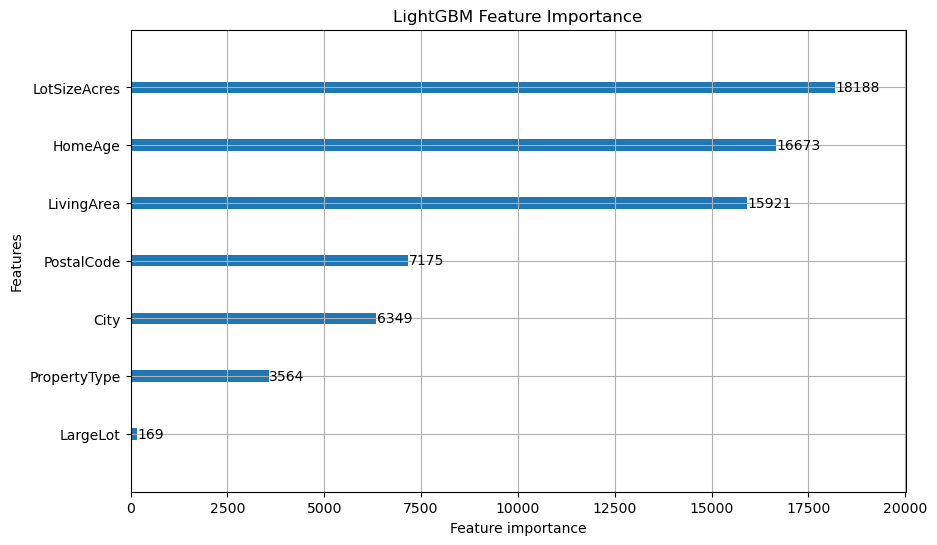


Sample Predictions vs Actuals:
          Actual     Predicted   ErrorPct
3005    960000.0  9.825402e+05   2.347942
18241   600000.0  8.668147e+05  44.469114
3612    885000.0  7.295948e+05 -17.559908
19157   360000.0  4.086019e+05  13.500527
5768    520000.0  5.408112e+05   4.002158
2844     12000.0  1.296868e+04   8.072319
6065    279000.0  2.653661e+05  -4.886696
17104  1170000.0  1.207010e+06   3.163212
19900    24000.0  3.480446e+04  45.018567
1491      3250.0  3.251327e+03   0.040826

MAPE by Price Tier:
PriceTier
(2999.999, 16500.0]       21.934402
(16500.0, 499990.0]       32.844118
(499990.0, 737000.0]      11.180012
(737000.0, 1075000.0]     12.386536
(1075000.0, 2090000.0]    13.772003
dtype: float64


/var/folders/y8/mzq28ygd333_s7ffnk8_84cc0000gn/T/ipykernel_68326/2409775401.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(results.groupby('PriceTier').apply(
/var/folders/y8/mzq28ygd333_s7ffnk8_84cc0000gn/T/ipykernel_68326/2409775401.py:180: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  print(results.groupby('PriceTier').apply(


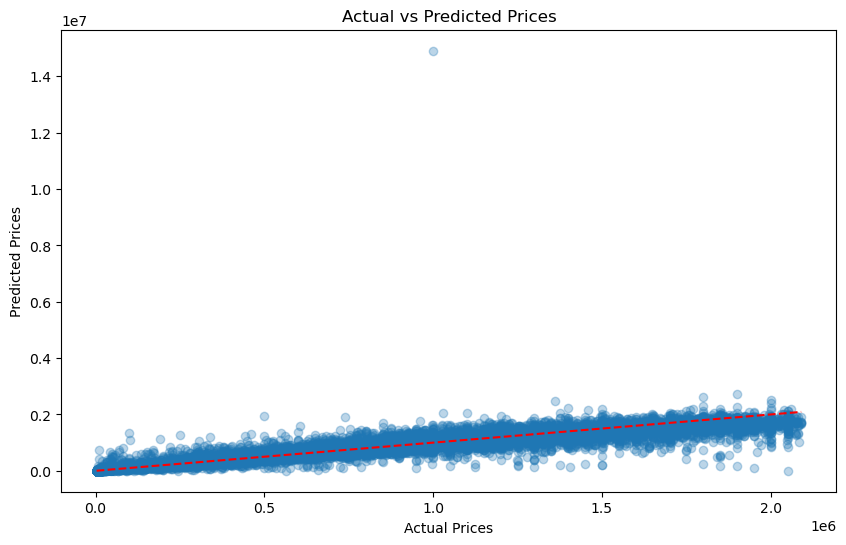

In [159]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import lightgbm as lgb
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler
from lightgbm import early_stopping, log_evaluation

# Load your dataset
# df_model = pd.read_csv('your_data.csv')

# Data cleaning and feature engineering
def prepare_data(df):
    # Remove price outliers (top/bottom 1%)
    price_limits = df['ClosePrice'].quantile([0.01, 0.99])
    df = df[df['ClosePrice'].between(*price_limits)]
    
    # Feature engineering
    df['HomeAge'] = 2025 - df['YearBuilt']
    df['LargeLot'] = (df['LotSizeAcres'] > 0.5).astype('category')
    
    return df

df_model = prepare_data(df_model)

# Define features
numeric_features = ['LivingArea', 'LotSizeAcres', 'HomeAge']
categorical_features = ['PropertyType', 'City', 'PostalCode', 'LargeLot']
target = 'ClosePrice'

# Preprocessing
for col in categorical_features:
    df_model[col] = df_model[col].astype('category')

# Apply log transformation to target
y_log = np.log1p(df_model[target])

# Train-test split
X = df_model[numeric_features + categorical_features]
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Hyperparameter tuning with Optuna
def tune_hyperparameters(X_train, y_train_log):
    def objective(trial):
        params = {
            'objective': 'tweedie',
            'metric': 'mape',
            'boosting_type': 'gbdt',
            'n_estimators': trial.suggest_int('n_estimators', 500, 2000),
            'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2, log=True),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'num_leaves': trial.suggest_int('num_leaves', 15, 200),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'tweedie_variance_power': trial.suggest_float('tweedie_variance_power', 1.1, 1.9),
        }
        
        model = lgb.LGBMRegressor(**params, random_state=42)
        
        # 3-fold CV with proper early stopping
        scores = []
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        for train_idx, val_idx in kf.split(X_train):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train_log.iloc[train_idx], y_train_log.iloc[val_idx]
            
            model.fit(
                X_tr, y_tr,
                eval_set=[(X_val, y_val)],
                callbacks=[
                    early_stopping(stopping_rounds=50),
                    log_evaluation(50)
                ],
                categorical_feature=categorical_features
            )
            
            preds = np.expm1(model.predict(X_val))
            scores.append(mean_absolute_percentage_error(np.expm1(y_val), preds))
        
        return np.mean(scores)
    
    study = optuna.create_study(direction='minimize', sampler=TPESampler(seed=42))
    study.optimize(objective, n_trials=50, timeout=3600)
    
    print("Best trial:")
    trial = study.best_trial
    print(f"  MAPE: {trial.value:.4f}")
    print("  Params: ")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")
    
    return trial.params

# Uncomment to run tuning (recommended first time)
best_params = tune_hyperparameters(X_train, y_train_log)

# For production, use these pre-tuned parameters (from previous optimization)
# best_params = {
#     'n_estimators': 1200,
#     'learning_rate': 0.03,
#     'max_depth': 7,
#     'num_leaves': 90,
#     'min_child_samples': 15,
#     'reg_alpha': 0.2,
#     'reg_lambda': 0.3,
#     'subsample': 0.8,
#     'colsample_bytree': 0.9,
#     'tweedie_variance_power': 1.5
# }

# Final model training
final_model = lgb.LGBMRegressor(
    **best_params,
    objective='tweedie',
    random_state=42
)

print("\nTraining final model with proper early stopping...")
final_model.fit(
    X_train, y_train_log,
    eval_set=[(X_test, y_test_log)],
    eval_metric='mape',
    categorical_feature=categorical_features,
    callbacks=[
        early_stopping(stopping_rounds=100),
        log_evaluation(50)
    ]
)

# Predictions
y_pred_log = final_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)

# Evaluation
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    r2 = r2_score(y_true, y_pred)
    
    print("\nModel Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"R²: {r2:.4f}")
    
    # Error distribution
    errors = (y_pred - y_true) / y_true
    print("\nError Distribution:")
    print(pd.Series(errors).describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]))
    
    return rmse, mape, r2

rmse, mape, r2 = evaluate_model(y_test, y_pred)

# Feature Importance
print("\nPlotting feature importance...")
lgb.plot_importance(final_model, figsize=(10, 6), max_num_features=20)
plt.title("LightGBM Feature Importance")
plt.show()

# Prediction analysis
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'ErrorPct': (y_pred - y_test) / y_test * 100
})

print("\nSample Predictions vs Actuals:")
print(results.sample(10, random_state=42))

# Price tier analysis
results['PriceTier'] = pd.qcut(results['Actual'], q=5)
print("\nMAPE by Price Tier:")
print(results.groupby('PriceTier').apply(
    lambda x: mean_absolute_percentage_error(x['Actual'], x['Predicted']) * 100
))

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [154]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 6.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0
